In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
city_df = pd.read_csv('dataset/GlobalLandTemperaturesByMajorCity.csv')
country_df = pd.read_csv('dataset/GlobalLandTemperaturesByCountry.csv')
global_temp_df = pd.read_csv('dataset/GlobalTemperatures.csv')

In [2]:
city_df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [3]:
global_temp_df.shape

(3192, 9)

In [4]:
city_df.Country.unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [5]:
global_temp_df = global_temp_df.set_index('dt')
global_temp_df.index = pd.to_datetime(global_temp_df.index)
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.head(5)


,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-12-31,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN
1751-12-31,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN
1752-12-31,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN
1753-12-31,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN
1754-12-31,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN


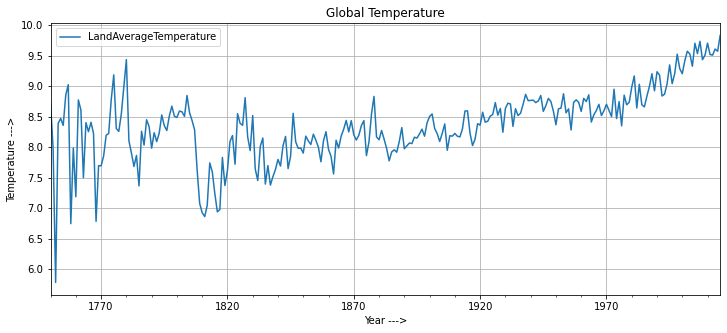

In [6]:
x = global_temp_df.loc[:,['LandAverageTemperature']]
x.plot(figsize=(12,5))
plt.title('Global Temperature')
plt.xlabel("Year --->")
plt.ylabel("Temperature --->")
plt.grid(True)

In [7]:
country_df = country_df.set_index('dt')
country_df.index = pd.to_datetime(country_df.index)
country_df.head(5)

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


In [8]:
country_diff = country_df.groupby([country_df.index.year.rename('year'),'Country']).AverageTemperature.mean().reset_index()
country_diff

,year,Country,AverageTemperature
0,1743,Albania,8.62000
1,1743,Andorra,7.55600
2,1743,Austria,2.48200
3,1743,Belarus,0.76700
4,1743,Belgium,7.10600
...,...,...,...
48238,2013,Western Sahara,23.74425
48239,2013,Yemen,28.12975
48240,2013,Zambia,21.19600
48241,2013,Zimbabwe,20.71075


In [9]:
country_diff = country_diff.groupby(['Country']).AverageTemperature.agg(['max','min']).reset_index()
country_diff['diff'] = country_diff['max']-country_diff['min']
country_diff

,Country,max,min,diff
0,Afghanistan,18.379571,12.547167,5.832405
1,Africa,25.472500,23.036000,2.436500
2,Albania,14.993875,5.588250,9.405625
3,Algeria,25.215667,10.343000,14.872667
4,American Samoa,27.537917,25.667167,1.870750
...,...,...,...,...
238,Western Sahara,25.412333,13.851000,11.561333
239,Yemen,28.129750,24.302222,3.827528
240,Zambia,22.813500,20.215000,2.598500
241,Zimbabwe,22.840333,19.725750,3.114583


In [10]:
country_temp_max = country_diff.nlargest(8, columns = 'diff')
country_temp_max

,Country,max,min,diff
39,Canada,0.792714,-22.616000,23.408714
180,Russia,-1.628333,-21.342000,19.713667
115,Kazakhstan,8.937250,-8.789000,17.726250
159,North America,6.436000,-11.192667,17.628667
119,Kuwait,27.638667,12.020000,15.618667
234,Uzbekistan,16.188250,0.848000,15.340250
232,United States,12.231000,-2.774667,15.005667
225,Turkmenistan,18.613500,3.693000,14.920500


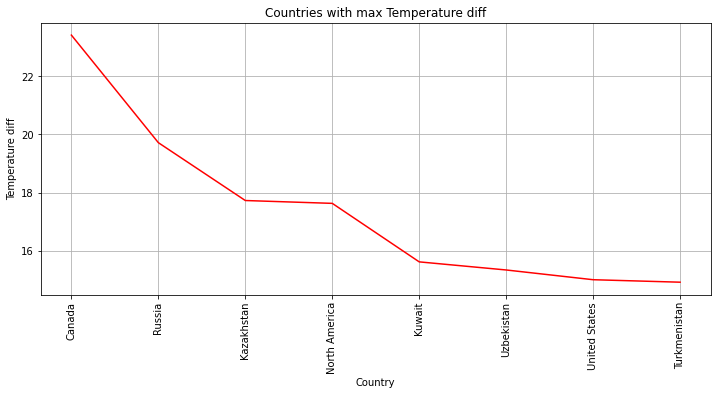

In [11]:
plt.figure(figsize=(12,5))
plt.title('Countries with max Temperature diff')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature diff')
plt.plot(country_temp_max['Country'],country_temp_max['diff'], color='r')
plt.grid(True)

In [12]:
country_temp_min = country_diff.nsmallest(8, columns = 'diff')
country_temp_min

,Country,max,min,diff
91,Guam,27.778417,26.144083,1.634333
161,Northern Mariana Islands,27.778417,26.144083,1.634333
166,Palau,28.006417,26.262667,1.743750
170,Papua New Guinea,25.419750,23.608917,1.810833
201,Somalia,27.975625,26.159083,1.816542
200,Solomon Islands,27.586250,25.755417,1.830833
203,South America,22.857000,21.024917,1.832083
188,Samoa,27.236667,25.388000,1.848667


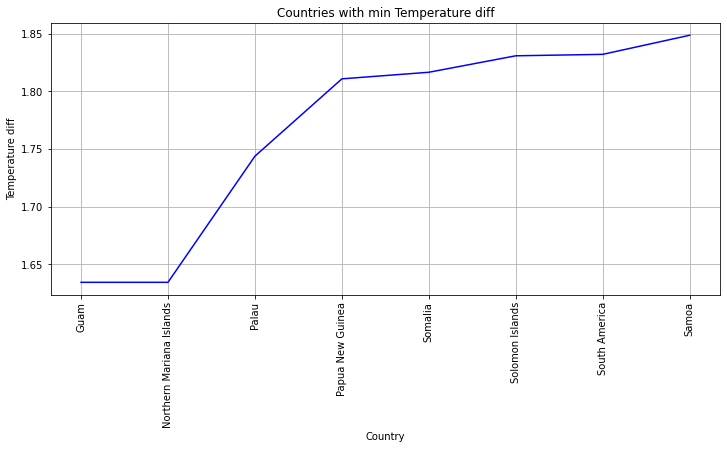

In [13]:
plt.figure(figsize=(12,5))
plt.title('Countries with min Temperature diff')
plt.xlabel('Country')
plt.xticks(rotation = 90)
plt.ylabel('Temperature diff')
plt.plot(country_temp_min['Country'],country_temp_min['diff'], color='b')
plt.grid(True)

In [14]:
developed = ['Norway', 'United Kingdom', 'France', 'Germany', 'Japan', 'Canada', 'Switzerland', 'United States', 'Sweden', 'South Korea', 'Australia']
developed_df=country_df[country_df.Country.isin(developed)]
developed_df=developed_df.groupby([developed_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developed_df.head()

,Year,Country,AverageTemperature
0,1743,France,10.203
1,1743,Germany,5.468
2,1743,Norway,-3.503
3,1743,Sweden,-1.444
4,1743,Switzerland,3.572


In [15]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia', 'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country_df[country_df.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


In [16]:
developing = ['China', 'India', 'Columbia', 'Brazil', 'Mexico', 'Indonesia', 'Philippines', 'Maldives', 'Turkey', 'South Africa', 'Libya']
developing_df=country_df[country_df.Country.isin(developing)]
developing_df=developing_df.groupby([developing_df.index.year.rename('Year'),'Country']).AverageTemperature.mean().reset_index()
developing_df.head()

,Year,Country,AverageTemperature
0,1777,Turkey,12.688500
1,1778,Turkey,11.931250
2,1779,Turkey,12.031333
3,1780,Turkey,12.248333
4,1781,Turkey,11.669083


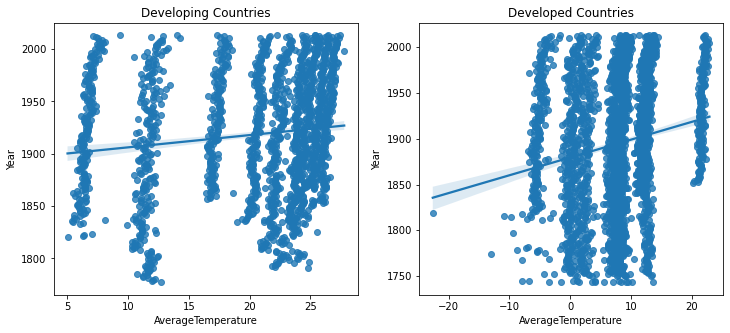

In [17]:
fig, axs = plt.subplots(ncols=2,figsize=(12,5))
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developing_df, ax=axs[0])
axs[0].set(title = 'Developing Countries')
sns.regplot(x='AverageTemperature',y='Year',fit_reg=True,data=developed_df, ax=axs[1])
axs[1].set(title ='Developed Countries');

In [18]:
developing_df = developing_df[developing_df['Year'] > 1900]
X = developing_df['Year'].values.reshape(-1,1)
print(X)
Y = developing_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#predict the test set results
y_pred_1 = regressor.predict(X_test)
y_pred_1

[[1901]
 [1901]
 [1901]
 ...
 [2013]
 [2013]
 [2013]]


array([19.77962655, 19.60692046, 20.4795407 , 20.51589988, 20.42500194,
       19.53420211, 19.77053676, 20.26138564, 19.56147149, 20.02505099,
       20.06141017, 20.39773255, 19.57965108, 19.61601026, 20.4795407 ,
       19.91597346, 20.27956523, 19.63418985, 19.65236943, 20.16139791,
       20.46136111, 20.55225905, 20.20684688, 19.77962655, 20.00687141,
       19.98869182, 20.05232038, 19.60692046, 20.37955296, 20.34319379,
       20.3250142 , 19.5432919 , 20.51589988, 19.97960202, 20.1704877 ,
       20.36137338, 20.25229585, 20.1704877 , 20.09776935, 19.73417758,
       19.56147149, 20.1704877 , 19.58874087, 19.88870408, 19.67054902,
       20.03414079, 19.94324285, 20.46136111, 19.79780614, 19.93415305,
       20.1704877 , 19.84325511, 20.46136111, 20.55225905, 20.37046317,
       20.35228358, 19.78871635, 20.31592441, 20.47045091, 20.11594893,
       19.8523449 , 20.30683461, 19.64327964, 19.83416532, 20.49772029,
       19.80689593, 19.82507552, 19.62510005, 19.8523449 , 20.04

In [19]:
regressor.predict([[2024]])

array([20.65224679])

In [20]:
developed_df = developed_df[developed_df['Year'] > 1900]
print(developed_df)
X = developed_df['Year'].values.reshape(-1,1)
Y = developed_df['AverageTemperature']
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#fit the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
#predict the test set results
y_pred_2 = regressor.predict(X_test)
#y_pred_2

      Year         Country  AverageTemperature
1383  1901       Australia           21.582583
1384  1901          Canada           -5.052250
1385  1901          France           12.328417
1386  1901         Germany            7.681083
1387  1901           Japan           11.680167
...    ...             ...                 ...
2621  2013     South Korea           13.760500
2622  2013          Sweden            4.199750
2623  2013     Switzerland            8.177500
2624  2013  United Kingdom            8.997500
2625  2013   United States           11.297111

[1243 rows x 3 columns]


In [21]:
regressor.predict([[2100]])

array([10.49088467])